In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

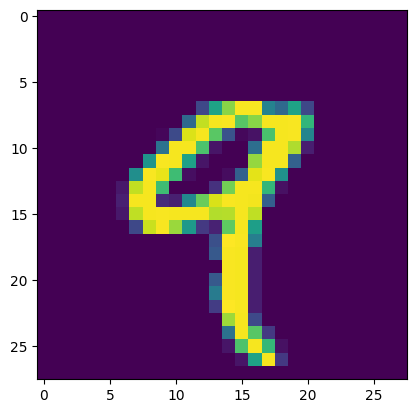

In [3]:
plt.imshow(x_train[4])

In [4]:
y_train[4]

9

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
x_train_flattened = x_train.reshape(len(x_train) , 28*28)
x_train_flattened.shape

(60000, 784)

In [9]:
x_test_flattened = x_test.reshape(len(x_test) , 28*28)
x_test_flattened.shape

(10000, 784)

In [10]:
model = keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,) , activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)

model.fit(x_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1216 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9841


In [11]:
model.evaluate(x_test_flattened , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9755


[0.07969700545072556, 0.9754999876022339]

In [12]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.8482788e-02, 1.0954912e-04, 7.4403012e-01, 9.2954892e-01,
       1.5926344e-06, 9.6924655e-02, 3.9037782e-06, 9.9999356e-01,
       4.5247510e-02, 3.7693560e-02], dtype=float32)

In [13]:
import numpy as np
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:4]

[7, 2, 1, 0]

In [14]:
cm = tf.math.confusion_matrix(labels = y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    2,    1,    4,    1,    2,    0],
       [   0, 1122,    4,    0,    0,    1,    2,    1,    5,    0],
       [   4,    0,  999,    3,    3,    3,    2,    6,   12,    0],
       [   0,    0,    2,  982,    1,   10,    0,    6,    7,    2],
       [   0,    0,    3,    0,  966,    0,    4,    3,    1,    5],
       [   2,    0,    0,    6,    0,  873,    3,    1,    6,    1],
       [   4,    2,    1,    2,    5,    9,  931,    0,    4,    0],
       [   0,    3,    7,    5,    2,    1,    0, 1002,    4,    4],
       [   1,    0,    3,    2,    4,    5,    1,    2,  952,    4],
       [   2,    3,    1,    5,   17,    6,    0,   13,    3,  959]])>

Text(95.72222222222221, 0.5, 'Truth')

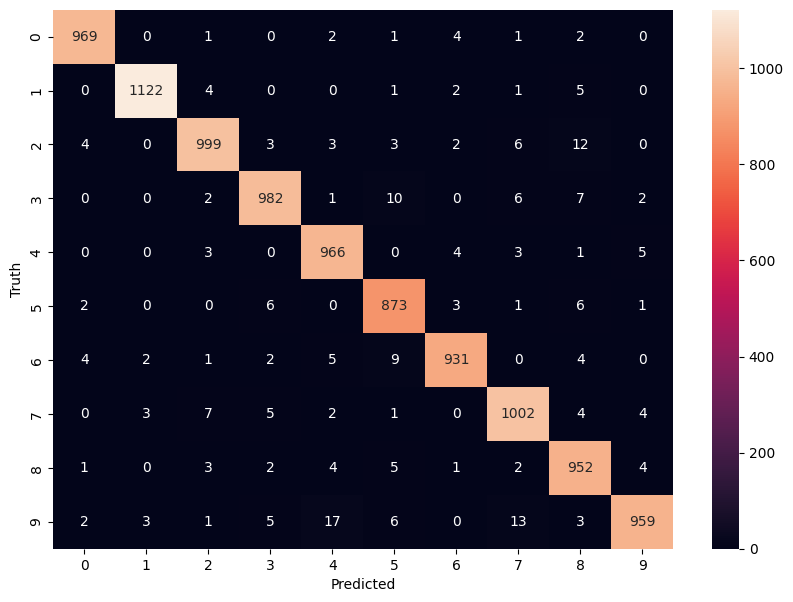

In [15]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot=True , fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")